In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datasist as ds
import warnings
import seaborn as sns
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile
from mlxtend.classifier import StackingCVClassifier
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score




%matplotlib inline
sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1)

import xgboost
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from pprint import pprint


In [2]:
heart_data = pd.read_csv('heart_failure.csv')

In [3]:
heart_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
x = heart_data.drop('DEATH_EVENT', axis = 1)
y = heart_data["DEATH_EVENT"]

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2698)

In [6]:
all_features = x.columns
all_features

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

In [7]:
from sklearn.feature_selection import SelectFromModel
rfc = RandomForestClassifier()

In [8]:
selector = SelectFromModel(estimator=rfc)

In [9]:
selector.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [10]:
selected_features_idx = selector.get_support(indices=True)
selected_features_idx

array([ 2,  4,  6,  7, 11], dtype=int64)

In [11]:
selected_features = all_features[selected_features_idx]
selected_features

Index(['creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'time'],
      dtype='object')

In [12]:
x_train = x_train[selected_features]
x_test = x_test[selected_features]

In [13]:
x_test

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,time
40,582,20,263358.03,1.83,31
179,835,40,279000.00,0.70,147
125,358,50,237000.00,1.30,97
264,582,38,147000.00,1.20,237
271,582,40,221000.00,0.90,244
223,582,25,130000.00,0.80,201
157,250,25,262000.00,1.00,120
231,93,35,185000.00,1.10,208
81,582,50,263358.03,1.18,76
273,64,40,189000.00,0.70,245


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
models = [LogisticRegression(), KNeighborsClassifier(), SVC(), DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier(),GaussianNB()]
for model in models:
    model.fit(x_train, y_train)
    print(model.score(x_test,y_test))

0.85
0.6833333333333333
0.7833333333333333
0.8166666666666667
0.9333333333333333
0.8833333333333333
0.85


In [15]:
mylist= []

In [16]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
r_pred = rfc.predict(x_test)
ac = accuracy_score(y_test, r_pred)
print(ac)

0.95


In [17]:
mylist.append(ac)

In [18]:
print(classification_report(y_test,r_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        47
           1       0.92      0.85      0.88        13

    accuracy                           0.95        60
   macro avg       0.94      0.91      0.92        60
weighted avg       0.95      0.95      0.95        60



In [19]:
confusion_matrix(y_test, r_pred)

array([[46,  1],
       [ 2, 11]], dtype=int64)

In [21]:
rfc.predict([[80,30,237000.00,1,12]])[0]

1

In [22]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
r_pred = lg.predict(x_test)
ac = accuracy_score(y_test, r_pred)
mylist.append(ac)
print(ac)

0.85


In [23]:
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)
r_pred = knc.predict(x_test)
ac = accuracy_score(y_test, r_pred)
mylist.append(ac)
print(ac)

0.6833333333333333


In [24]:
svc = SVC()
svc.fit(x_train, y_train)
r_pred = svc.predict(x_test)
ac = accuracy_score(y_test, r_pred)
mylist.append(ac)
print(ac)

0.7833333333333333


In [25]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
r_pred = dtc.predict(x_test)
ac = accuracy_score(y_test, r_pred)
mylist.append(ac)
print(ac)

0.8333333333333334


In [26]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
r_pred = xgb.predict(x_test)
ac = accuracy_score(y_test, r_pred)
mylist.append(ac)
print(ac)

0.8833333333333333


In [27]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
r_pred = gnb.predict(x_test)
ac = accuracy_score(y_test, r_pred)
mylist.append(ac)
print(ac)

0.85


In [30]:
mylist

[0.95,
 0.85,
 0.6833333333333333,
 0.7833333333333333,
 0.8333333333333334,
 0.8833333333333333,
 0.85]

In [31]:
mylist2 = ["RandomForestClassifier", "LogisticRegression","KNeighborsClassifier","SVC","DecisionTreeClassifier","XGBClassifier", "GaussianNB"]

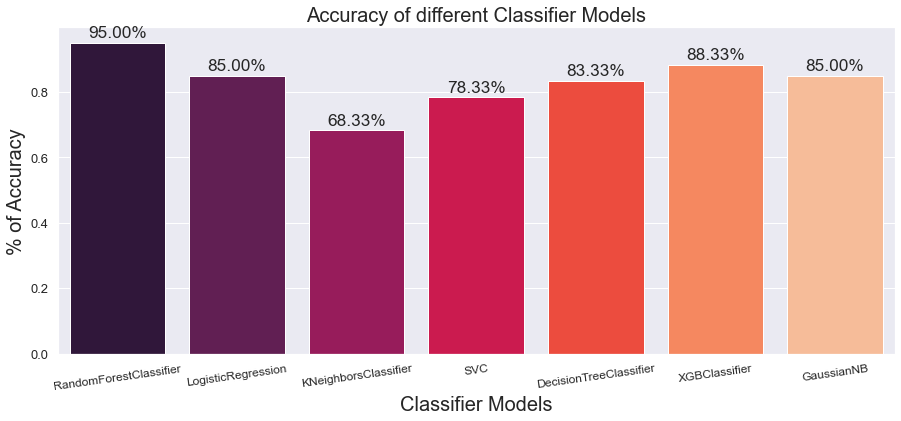

In [32]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [28]:
#import joblib

In [29]:
#joblib.dump(rfc, 'RFC95.pkl')

['RFC95.pkl']

In [ ]:
#creatinine_phosphokinase	ejection_fraction	platelets	serum_creatinine	time